Analyzing chinese:
  Lower Bound: 66.25
  Upper Bound: 104.25
  Outliers for chinese:
    id  chinese  english  math
26  27       66       90    82
------------------------------
Analyzing english:
  Lower Bound: 70.0
  Upper Bound: 102.0
  Outliers for english:
Empty DataFrame
Columns: [id, chinese, english, math]
Index: []
------------------------------
Analyzing math:
  Lower Bound: 68.875
  Upper Bound: 103.875
  Outliers for math:
    id  chinese  english  math
11  12       82       91    66
------------------------------

Data after removing outliers:


,id,chinese,english,math
0,1,87,85,82
1,2,92,87,90
2,3,80,91,87
3,4,78,82,95
4,5,88,89,90
5,6,82,87,88
6,7,90,92,82
7,8,87,80,90
8,9,95,78,87
9,10,90,88,95


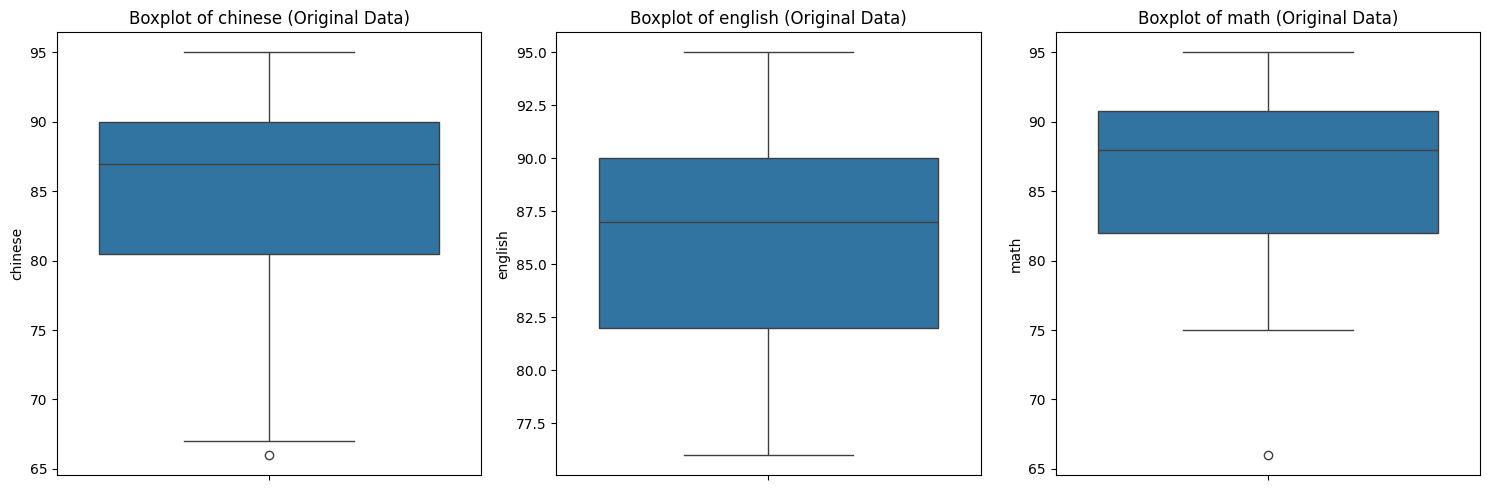

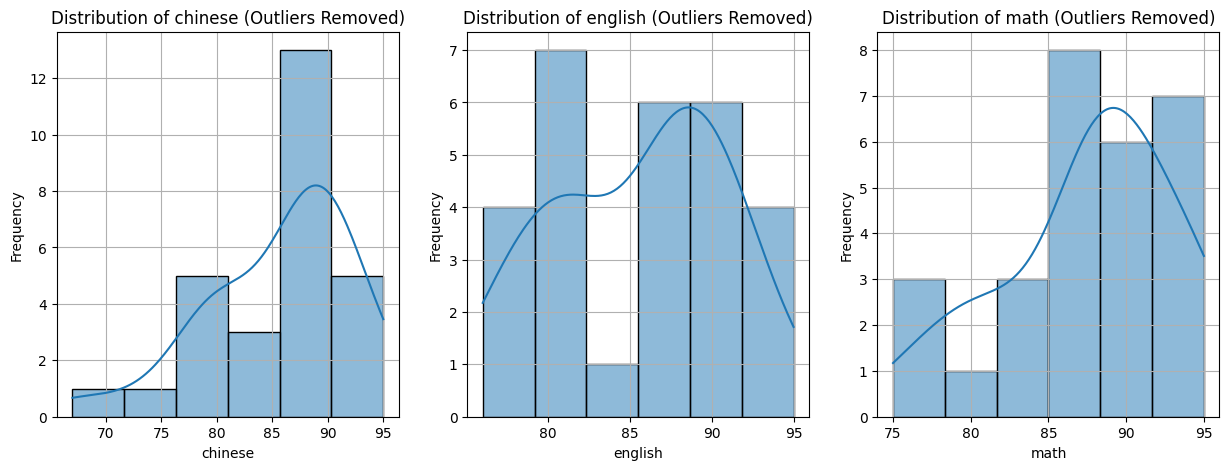

In [ ]:
# prompt: 請以 J. W. TUKEY在1977年於Exploratory Data Analysis所發表的方式,計算scores.csv三個欄位:chinese, english, math 的離群值,並繪製盒鬚圖與常態分配圖

# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the data
folder="/"
df = pd.read_csv("Titanic3.csv")

# Define the function to find outliers using Tukey's method
def find_outliers_tukey(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to analyze
subjects = ['chinese', 'english', 'math']
df_filtered = df.copy() # Create a copy to store filtered data

# Analyze each subject and remove outliers
for subject in subjects:
    print(f"Analyzing {subject}:")
    outliers, lower_bound, upper_bound = find_outliers_tukey(df, subject)
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Outliers for {subject}:\n{outliers}")
    print("-" * 30)
    # Remove outliers from the filtered DataFrame
    df_filtered = df_filtered[(df_filtered[subject] >= lower_bound) & (df_filtered[subject] <= upper_bound)]


print("\nData after removing outliers:")
display(df_filtered)


# Plotting Boxplots (using the original data to show outliers before removal)
plt.figure(figsize=(15, 5))
for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[subject])
    plt.title(f'Boxplot of {subject} (Original Data)')
plt.tight_layout()
plt.show()

# Plotting Normal Distribution (Histograms with KDE) (using the filtered data)
plt.figure(figsize=(15, 5))
for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_filtered[subject], kde=True)
    plt.title(f'Distribution of {subject} (Outliers Removed)')
    plt.xlabel(subject)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.show()